For this example we'll utilize the [MNIST](https://www.wikiwand.com/en/MNIST_database) dataset. A dataset of handwriten digits.

The pixel training image is 28x28 pixels = 784 pixels overall. Each pixel has a value between 0 and 255. 255 being completely white and 0 being completely black.

The pixels can be represented as a matrix where each row will be 784 columns long, because each row will correspond to each pixel in the image. Then the matrix will be transposed (i.e. columns become rows and rows become columns).



In [1]:
# Import the essential libraries for numerical functions, dataset and plots, respectively.
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Get the train data
data = pd.read_csv("../src/dataset/train.csv")

In [3]:
# Show the train data
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Convert the data into Numpy Array
data = np.array(data)
rows_amount, features_amount_plus_one = data.shape
np.random.shuffle(data)

# Set the dev data & transpose it
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:features_amount_plus_one]
X_dev = X_dev / 255.

# Set the train data & transpose it
data_train = data[1000:rows_amount].T
Y_train = data_train[0]
X_train = data_train[1:features_amount_plus_one]
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
#X_train[:, 0].shape
Y_train

array([6, 4, 6, ..., 1, 8, 1], dtype=int64)

In [6]:
# Initiate parameters
def initiate_parameters():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

# Forward propagation
def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def derivative_ReLU(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


# Backward propagation
def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/rows_amount * dZ2.dot(A1.T)
    db2 = 1/rows_amount * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derivative_ReLU(Z1)
    dW1 = 1/rows_amount * dZ1.dot(X.T)
    db1 = 1/rows_amount * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [7]:
#def loss(X, Y, A2):
    #rows_amount = Y.size
    #log_likelihood = - np.log(A2[Y, range(rows_amount)])
    #loss = 1 / rows_amount * np.sum(log_likelihood)
    #return loss

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = initiate_parameters()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [22]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 5000)

Iteration:  0
[6 6 8 ... 6 9 6] [6 4 6 ... 1 8 1]
0.09419512195121951
Iteration:  10
[6 8 8 ... 3 9 1] [6 4 6 ... 1 8 1]
0.1603658536585366
Iteration:  20
[6 6 0 ... 1 9 1] [6 4 6 ... 1 8 1]
0.2665365853658537
Iteration:  30
[6 6 0 ... 1 9 1] [6 4 6 ... 1 8 1]
0.36309756097560975
Iteration:  40
[6 4 0 ... 1 9 1] [6 4 6 ... 1 8 1]
0.4497317073170732
Iteration:  50
[6 4 0 ... 1 9 1] [6 4 6 ... 1 8 1]
0.5131219512195122
Iteration:  60
[6 4 0 ... 1 8 1] [6 4 6 ... 1 8 1]
0.5629024390243902
Iteration:  70
[6 4 6 ... 1 8 1] [6 4 6 ... 1 8 1]
0.5996829268292683
Iteration:  80
[6 4 6 ... 1 8 1] [6 4 6 ... 1 8 1]
0.629219512195122
Iteration:  90
[6 4 6 ... 1 8 1] [6 4 6 ... 1 8 1]
0.6536829268292683
Iteration:  100
[6 4 6 ... 1 8 1] [6 4 6 ... 1 8 1]
0.672609756097561
Iteration:  110
[6 4 6 ... 1 8 1] [6 4 6 ... 1 8 1]
0.6889268292682926
Iteration:  120
[6 4 6 ... 1 8 1] [6 4 6 ... 1 8 1]
0.7022926829268292
Iteration:  130
[6 4 6 ... 1 8 1] [6 4 6 ... 1 8 1]
0.7162926829268292
Iteration:  140
[

In [23]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


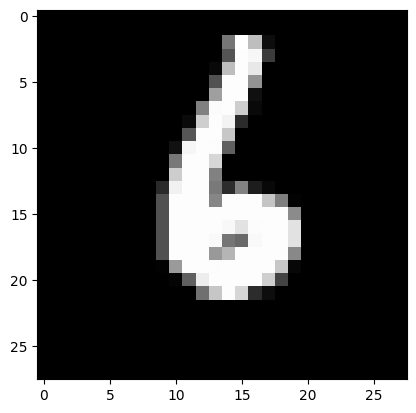

Prediction:  [4]
Label:  4


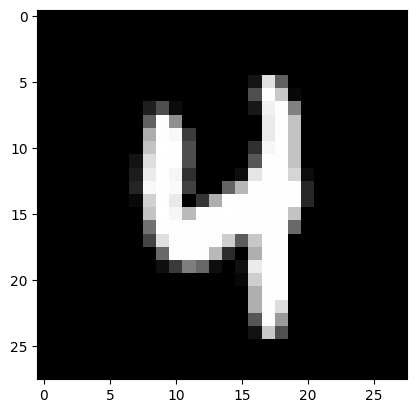

Prediction:  [6]
Label:  6


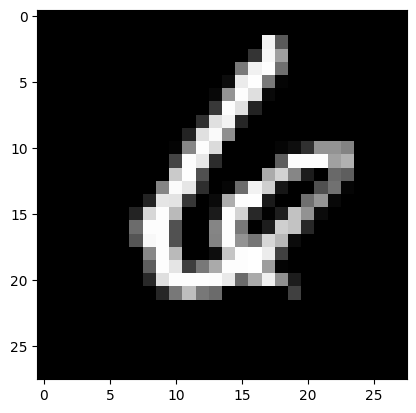

Prediction:  [4]
Label:  4


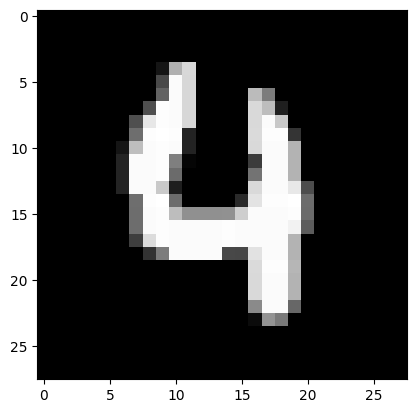

Prediction:  [5]
Label:  5


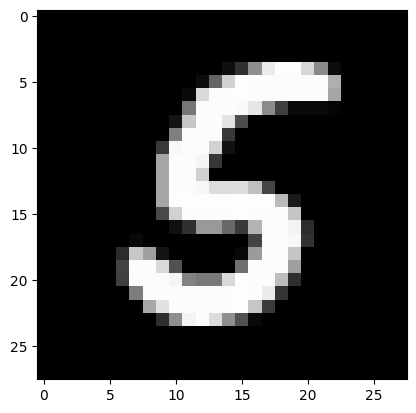

Prediction:  [8]
Label:  8


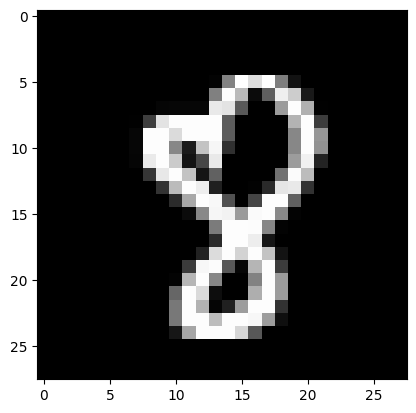

Prediction:  [0]
Label:  0


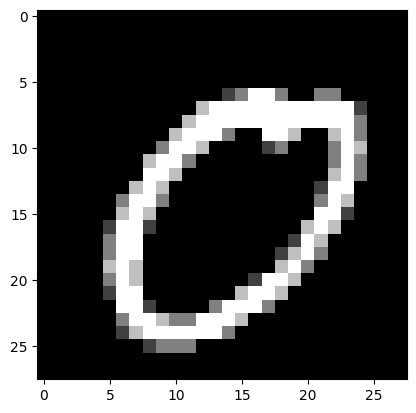

Prediction:  [1]
Label:  1


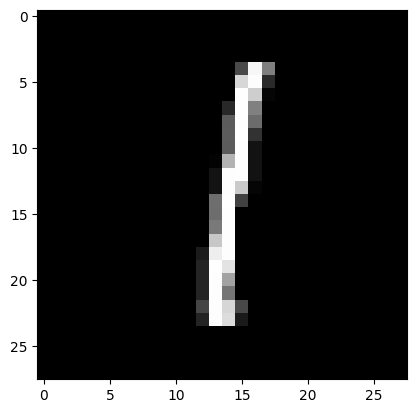

Prediction:  [8]
Label:  8


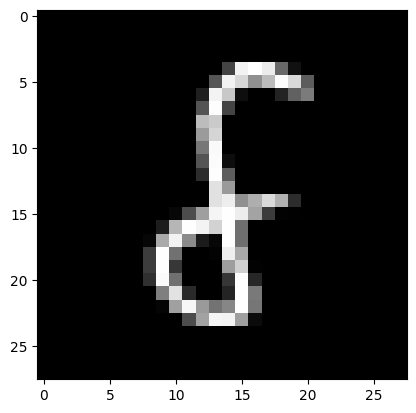

Prediction:  [5]
Label:  5


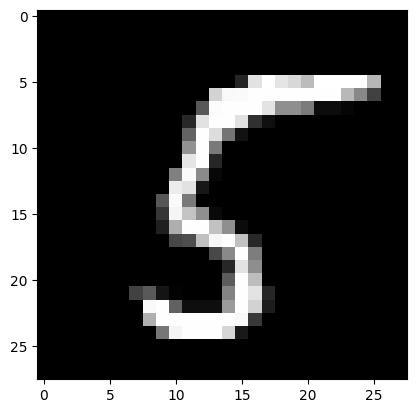

In [24]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)
test_prediction(8, W1, b1, W2, b2)
test_prediction(9, W1, b1, W2, b2)

In [25]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 8 7 4 4 3 9 7 9 1 9 3 9 7 7 6 1 4 1 5 7 1 7 2 4 3 4 1 0 7 6 4 7 4 7 9 0
 6 2 8 7 5 1 6 9 5 9 8 2 5 6 8 1 2 9 2 8 7 2 4 7 9 4 1 9 0 6 9 8 2 3 4 8 3
 6 0 7 3 8 1 8 8 6 3 0 2 7 4 6 9 4 2 4 9 6 8 8 0 9 8 3 2 7 5 5 9 5 2 2 1 6
 9 6 9 1 1 5 6 6 3 8 5 9 9 0 3 9 1 1 8 2 7 6 3 6 5 9 1 5 7 8 7 7 4 2 8 8 7
 9 7 2 2 8 4 7 6 0 4 4 1 1 2 6 4 7 8 5 0 3 4 0 4 0 2 7 8 9 9 8 3 3 7 2 9 5
 7 1 2 6 5 6 7 3 2 5 9 0 5 6 7 0 9 7 3 6 6 9 7 5 6 9 8 6 6 8 7 4 8 7 3 8 4
 9 1 7 6 6 1 5 1 7 7 1 2 7 1 7 2 3 3 1 7 1 6 1 3 4 0 8 3 9 9 2 8 3 0 9 2 1
 6 3 7 7 3 2 1 5 9 9 3 1 1 8 1 5 8 6 3 9 1 3 6 2 2 4 9 9 7 9 7 2 3 4 4 1 7
 7 2 1 4 4 3 8 0 1 0 8 8 4 0 7 5 0 3 5 3 2 4 7 7 9 6 7 5 8 0 1 5 3 3 1 1 8
 5 1 1 1 6 9 3 5 9 2 1 2 1 0 5 3 4 8 9 4 9 7 6 7 9 7 7 9 0 8 4 4 7 6 0 7 1
 9 7 3 8 2 5 6 4 6 9 2 9 3 2 5 0 9 5 7 8 5 1 8 9 5 7 0 7 9 0 8 7 4 0 5 2 5
 8 8 8 9 2 1 3 2 8 8 5 4 2 3 7 6 1 3 9 6 0 5 1 7 7 5 9 6 0 4 4 9 2 7 2 8 8
 1 8 9 1 8 7 8 3 2 2 8 7 8 8 6 4 7 8 1 7 9 4 3 2 8 8 7 0 1 0 0 6 7 1 6 6 5
 5 7 4 1 5 3 8 2 9 8 3 3 

0.925